In [1]:
import numpy as np 
import pandas as pd
import os
print(os.listdir("/home/mlab/Documents/totaldata_fixed"))

['val', 'test', 'train']


In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import random 
import gc
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.


In [4]:
#uses a smal vggnet
#32->64->128->512
# create a data generator
# 44938
# 5616
nb_train_samples = 44938
nb_validation_samples = 5616
epochs = 8
batch_size = 32

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(512,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid')) #uses sigmoid at the end because we onlu have two classes

W1115 08:27:05.931692 139693199931200 deprecation_wrapper.py:119] From /home/mlab/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1115 08:27:05.940986 139693199931200 deprecation_wrapper.py:119] From /home/mlab/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1115 08:27:05.942862 139693199931200 deprecation_wrapper.py:119] From /home/mlab/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1115 08:27:05.953106 139693199931200 deprecation_wrapper.py:119] From /home/mlab/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1115 08:27:05.

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 512)       590336    
__________

In [7]:
#We use the RMSprop optimizer with a learning rate of 0.0001
#We use ninary_crossentropy loss because its a binary classification
#optimizer = Adam(learning_rate=lr_schedule(0))
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['acc'])

W1115 08:27:06.091823 139693199931200 deprecation_wrapper.py:119] From /home/mlab/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1115 08:27:06.095214 139693199931200 deprecation_wrapper.py:119] From /home/mlab/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1115 08:27:06.098152 139693199931200 deprecation.py:323] From /home/mlab/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
val_datagen=ImageDataGenerator(rescale=1./255)

# load and iterate training dataset
train_generator = train_datagen.flow_from_directory('/home/mlab/Documents/brats_hl_data/train/', 
                                       class_mode='binary', 
                                       batch_size=batch_size,
                                       target_size=(150,150))

# load and iterate validation dataset
val_generator = val_datagen.flow_from_directory('/home/mlab/Documents/brats_hl_data/val/', 
                                     class_mode='binary', 
                                     batch_size=batch_size,
                                    target_size=(150,150))
# load and iterate test dataset
# datagen=ImageDataGenerator(rescale=1./255)
# test_generator = datagen.flow_from_directory('/home/mlab/Documents/totaldata_fixed/test/', 
#                                       class_mode='binary', 
#                                       batch_size=64, 
#                                       target_size=(150,150))
# # confirm the iterator works
# batchX, batchy = train_it.next()
# print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Found 44938 images belonging to 2 classes.
Found 5616 images belonging to 2 classes.


In [9]:
#the training part
#train for 64 epochs with about 100 steps per epoch
history = model.fit_generator(train_generator,
                             steps_per_epoch=nb_train_samples//batch_size,
                             epochs=epochs,
                             validation_data=val_generator,
                             validation_steps=nb_validation_samples//batch_size)

Epoch 1/8
1404/1404 [==============================] - 674s 480ms/step - loss: 0.6429 - acc: 0.6154 - val_loss: 0.6336 - val_acc: 0.6225
Epoch 2/8
1404/1404 [==============================] - 669s 476ms/step - loss: 0.5913 - acc: 0.6696 - val_loss: 0.5917 - val_acc: 0.6599
Epoch 3/8
1404/1404 [==============================] - 664s 473ms/step - loss: 0.5666 - acc: 0.6858 - val_loss: 0.5432 - val_acc: 0.6948
Epoch 4/8
1404/1404 [==============================] - 673s 479ms/step - loss: 0.5462 - acc: 0.6988 - val_loss: 0.5376 - val_acc: 0.7040
Epoch 5/8
1404/1404 [==============================] - 666s 475ms/step - loss: 0.5315 - acc: 0.7108 - val_loss: 0.5372 - val_acc: 0.6961
Epoch 6/8
1404/1404 [==============================] - 666s 474ms/step - loss: 0.5195 - acc: 0.7213 - val_loss: 0.5958 - val_acc: 0.6850
Epoch 7/8
1404/1404 [==============================] - 662s 471ms/step - loss: 0.5061 - acc: 0.7258 - val_loss: 0.5436 - val_acc: 0.7120
Epoch 8/8
1404/1404 [====================

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
# Y_pred = model.predict_generator(val_generator, 5616 // batch_size)
Y_pred = model.predict_generator(val_generator,nb_validation_samples//batch_size+1)
y_pred = np.argmax(Y_pred,axis=1)
# print(y_pred)
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))
print('Classification Report')
target_names = ['Low', 'High']
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[2775    0]
 [2841    0]]
Classification Report
              precision    recall  f1-score   support

         Low       0.49      1.00      0.66      2775
        High       0.00      0.00      0.00      2841

   micro avg       0.49      0.49      0.49      5616
   macro avg       0.25      0.50      0.33      5616
weighted avg       0.24      0.49      0.33      5616



/home/mlab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mlab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mlab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


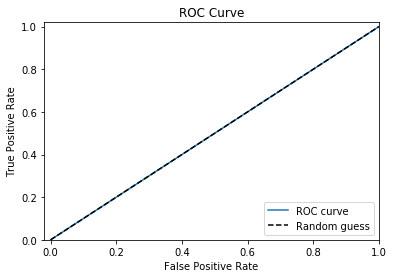

In [12]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline



fpr, tpr, thresholds = roc_curve(val_generator.classes, y_pred)

# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [14]:
from sklearn.metrics import roc_auc_score

roc_auc_score(val_generator.classes, y_pred)

0.5

In [ ]:
# #save the model
model.save_weights('first_try.h5')
# model.save('model_keras.h5')

In [15]:
batchX, batchy = train_generator.next()
_, accuracy = model.evaluate(batchX, batchy)
print('Accuracy training: %.2f' % (accuracy*100))
batchXv, batchyv = val_generator.next()
_, accuracy = model.evaluate(batchXv, batchyv)
print('Accuracy val: %.2f' % (accuracy*100))

32/32 [==============================] - 0s 3ms/step
Accuracy training: 53.12
32/32 [==============================] - 0s 2ms/step
Accuracy val: 65.62


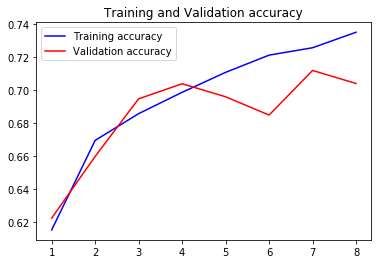

In [16]:
# A rule of thumb definition is that over fitting occurs when your train accuracy 
# keeps improving while your validation accuracy stops improving 
# (or even starts getting worse).


#plot the train and val curve
#get the details from the history object
acc = history.history['acc']
val_acc=history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

#train and validation accuracy
plt.plot(epochs,acc,'b',label='Training accuracy')
plt.plot(epochs,val_acc,'r',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

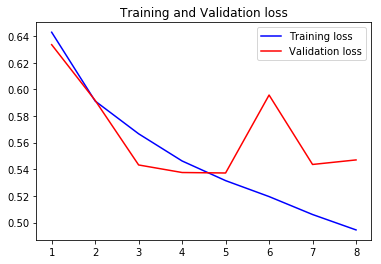

In [17]:
#train and validation loss
plt.plot(epochs, loss, 'b',label='Training loss')
plt.plot(epochs, val_loss, 'r',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [18]:
datagen=ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory('/home/mlab/Documents/brats_hl_data/test/', 
                                      class_mode='binary', 
                                      batch_size=batch_size, 
                                      target_size=(150,150))

scores = model.evaluate_generator(test_generator, steps=nb_validation_samples//batch_size)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.4f" % (model.metrics_names[0], scores[0]))

Found 5619 images belonging to 2 classes.
acc: 69.50%
loss: 0.5541


In [19]:
#Confution Matrix and Classification Report
# Y_pred = model.predict_generator(val_generator, 5616 // batch_size)
Y_pred = model.predict_generator(test_generator,nb_validation_samples//batch_size+1)
y_pred = np.argmax(Y_pred,axis=1)
# print(y_pred)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Low', 'High']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[2776    0]
 [2843    0]]
Classification Report
              precision    recall  f1-score   support

         Low       0.49      1.00      0.66      2776
        High       0.00      0.00      0.00      2843

   micro avg       0.49      0.49      0.49      5619
   macro avg       0.25      0.50      0.33      5619
weighted avg       0.24      0.49      0.33      5619



/home/mlab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mlab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mlab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
